In this notebook, I will be working in the final assignment of the ML BOOTCAMP offered by DPHI 

# Dataset and Problem 

The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

- Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment

- Survived_1_year == 1, implies that the patient survived after 1 year of treatment


So the predection model will be used is "Logistic Regression"


This data set contains the following features:

- D_Patient_Care_Situation: Care situation of a patient during treatment

- Diagnosed_Condition: The diagnosed condition of the patient

- ID_Patient: Patient identifier number

- Treatment_with_drugs: Class of drugs used during treatment

- Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)

- Patient_Age: Age of the patient

- Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.

- Patient_Smoker: If the patient was a smoker or not

- Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country

- Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

# Import Libraries

In [1]:
# Data analysis and manipulation tool
import pandas as pd 
# A fundamental package for scientific computing with Python
import numpy as np 
# For interactive visualization in Python
import matplotlib.pyplot as plt
# Data visualization library based on matplotlib. It provides a high-level interface
# for drawing attractive and informative statistical graphics.
import seaborn as sns 
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split 
# Import the Logistic Regression class from sklear.linear_model
from sklearn.linear_model import LogisticRegression 
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor


# Loading Data

In [2]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [3]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


# Data Preparation

In [4]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [5]:
len(pharma_data)

23097

In [6]:
pharma_data ['Treated_with_drugs'] 

0             DX6
1            DX2 
2             DX6
3            DX1 
4             NaN
           ...   
23092    DX2 DX4 
23093         DX6
23094         DX6
23095        DX3 
23096         DX6
Name: Treated_with_drugs, Length: 23097, dtype: object

In [7]:
pharma_data.Treated_with_drugs.unique()

array(['DX6', 'DX2 ', 'DX1 ', nan, 'DX3 ', 'DX5 ', 'DX4 ', 'DX2 DX5 ',
       'DX2 DX3 ', 'DX1 DX3 ', 'DX1 DX2 ', 'DX3 DX4 ', 'DX1 DX4 ',
       'DX1 DX5 ', 'DX2 DX4 DX5 ', 'DX1 DX2 DX3 ', 'DX3 DX5 ', 'DX2 DX4 ',
       'DX3 DX4 DX5 ', 'DX2 DX3 DX5 ', 'DX1 DX2 DX3 DX4 ', 'DX4 DX5 ',
       'DX2 DX3 DX4 ', 'DX1 DX4 DX5 ', 'DX1 DX2 DX4 ', 'DX1 DX3 DX5 ',
       'DX1 DX2 DX5 ', 'DX1 DX3 DX4 ', 'DX1 DX3 DX4 DX5 ',
       'DX1 DX2 DX4 DX5 ', 'DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX3 DX5 ',
       'DX1 DX2 DX3 DX4 DX5 '], dtype=object)

In [8]:
pharma_data = pharma_data.drop('Treated_with_drugs', axis = 1)

In [9]:
pharma_data ['Patient_Smoker'] 

0               YES
1               YES
2               YES
3                NO
4        Cannot say
            ...    
23092            NO
23093            NO
23094           YES
23095           YES
23096           YES
Name: Patient_Smoker, Length: 23097, dtype: object

In [10]:
pharma_data['Patient_Smoker'] = pharma_data ['Patient_Smoker'].apply(lambda x: 1 if x == 'YES' else 0)

In [11]:
pharma_data ['Patient_Rural_Urban']

0        URBAN
1        RURAL
2        RURAL
3        URBAN
4        RURAL
         ...  
23092    RURAL
23093    RURAL
23094    RURAL
23095    RURAL
23096    RURAL
Name: Patient_Rural_Urban, Length: 23097, dtype: object

In [12]:
pharma_data['Patient_Rural_Urban'] = pharma_data ['Patient_Rural_Urban'].apply(lambda x: 1 if x == 'URBAN' else 0)

In [13]:
pharma_data ['Patient_mental_condition']

0        Stable
1        Stable
2        Stable
3        Stable
4        Stable
          ...  
23092    Stable
23093    Stable
23094    Stable
23095    Stable
23096    Stable
Name: Patient_mental_condition, Length: 23097, dtype: object

In [14]:
pharma_data['Patient_mental_condition'] = pharma_data ['Patient_mental_condition'].apply(lambda x: 1 if x == 'Stable' else 0)

In [15]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,23097.0,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.425943,0.301468,1.0,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.494496,0.458905,0.0,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [16]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [17]:
#pharma_data.Treated_with_drugs.fillna('Unknown', inplace = True)

In [18]:
pharma_data.A.fillna('0.0', inplace = True)
pharma_data.B.fillna('0.0', inplace = True)
pharma_data.C.fillna('0.0', inplace = True)
pharma_data.D.fillna('0.0', inplace = True)
pharma_data.E.fillna('0.0', inplace = True)
pharma_data.F.fillna('0.0', inplace = True)
pharma_data.Z.fillna('0.0', inplace = True)
pharma_data.Number_of_prev_cond.fillna('0.0', inplace = True)

In [19]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

# Exploratory Data Analysis (EDA)

Text(0, 0.5, 'Number of data points')

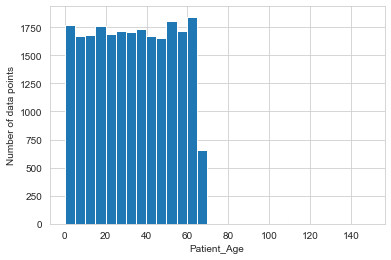

In [20]:
# Plotting histogram of the age variable
sns.set_style('whitegrid') # sets the style of the plots; it affects things like color of the axes, whether grid enabled or not.
pharma_data['Patient_Age'].hist(bins=30) # plots histogram with with bins = 30
plt.xlabel('Patient_Age') # labels the x - axis as 'Patient_Age'
plt.ylabel('Number of data points') # labels y - axis as 'Number of data points'

The graph shows that the range of patient ages in the dataset ranges from 0 to about 70 years which means that most of the patients should survive after 1 year of treatment because most of them are not in the high risk group. 

<AxesSubplot:xlabel='Survived_1_year', ylabel='count'>

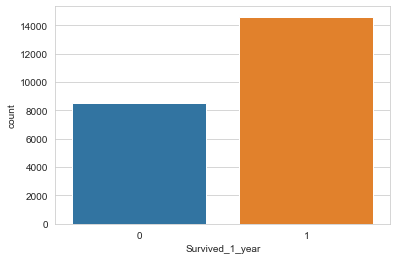

In [21]:
sns.countplot(x='Survived_1_year',data=pharma_data)

14000 patients survived and about 8000 not survived 

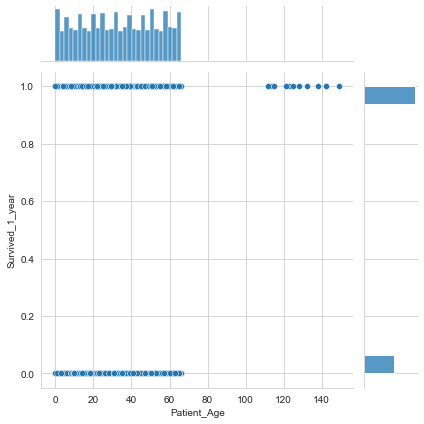

In [22]:
sns.jointplot(x='Patient_Age',y='Survived_1_year',data=pharma_data)

From the graph, i observed that from the survived patients there are small number of patients over 70 years old.  

<AxesSubplot:xlabel='Patient_Smoker', ylabel='count'>

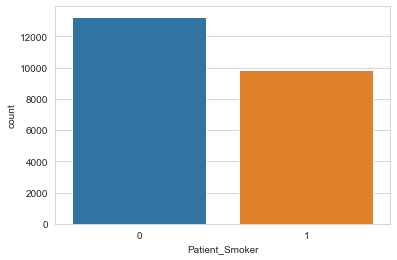

In [23]:
sns.countplot(x='Patient_Smoker',data=pharma_data)

non smokers patients exceeds the smoker patient but with a small difference 

# Split the data into train and test set

In [24]:
# Separate feature columns and target column
# We have freedom to chose features on which we want to train our model
X = pharma_data[['ID_Patient_Care_Situation','Diagnosed_Condition','Patient_ID', 'Patient_Age','Patient_Body_Mass_Index','Patient_Smoker','Patient_Rural_Urban','Patient_mental_condition','A','B','C','D','E','F','Z','Number_of_prev_cond']]# feature columns
y = pharma_data['Survived_1_year'] # target column 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [26]:
print("Original shape of dataset: {}".format(pharma_data.shape)) # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape)) # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape)) # shape of testing dataset after split

Original shape of dataset: (23097, 17)
Shape of training dataset: (16167, 16)
Shape of testing dataset: (6930, 16)


# Trainning Model

# 1- Logistic Regression 

In [27]:
model = LogisticRegression() 
model.fit(X_train,y_train) # Fitting the model
LogisticRegression(C=1.0, 
                   class_weight=None,
                   dual=False, 
                   fit_intercept=True,
                   intercept_scaling=1, 
                   l1_ratio=None,
                   max_iter=100,
                   multi_class='auto',
                   n_jobs=None, 
                   penalty='l2',
                   random_state=None,
                   #solver='lbfgs',
                   solver= 'liblinear',
                   tol=0.0001,
                   verbose=0,
                   warm_start=False)


LogisticRegression(solver='liblinear')

# Prediction

In [28]:
predictions = model.predict(X_test) # predict for test data i.e. X_test

In [29]:
# look at the prected values
predictions

array([1, 1, 1, ..., 0, 0, 0])

In [30]:
len(predictions) # we have 6930 records in X_test, so we have 6930 predicted values

6930

# Model Evaluation

In [31]:
print(accuracy_score(y_test,predictions))

0.6538239538239539


# 2- Decision Tree

In [32]:
model = DecisionTreeClassifier(max_depth=9)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

# Prediction

In [33]:
predictions = model.predict(X_test) # predict for test data i.e. X_test

In [34]:
# look at the prected values
predictions

array([0, 1, 0, ..., 1, 0, 1])

In [35]:
len(predictions)

6930

# Model Evaluation

In [36]:
print(accuracy_score(y_test,predictions))

0.7675324675324675


# Make Prediction on Test Dataset

We have trained our model, evaluated it and now finally we will predict the output/target for the testing data

In [37]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [38]:
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
test_data = test_data.drop('Treated_with_drugs', axis = 1)
test_data['Patient_Smoker'] = test_data ['Patient_Smoker'].apply(lambda x: 1 if x == 'YES' else 0)
test_data['Patient_Rural_Urban'] = test_data ['Patient_Rural_Urban'].apply(lambda x: 1 if x == 'URBAN' else 0)
test_data['Patient_mental_condition'] = test_data ['Patient_mental_condition'].apply(lambda x: 1 if x == 'Stable' else 0)

In [40]:
len(test_data)

9303

In [41]:
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,16,29.443894,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,24,26.836321,0,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,63,25.523280,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,42,27.171155,0,1,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,50,25.556192,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
predictions = model.predict(test_data)

In [43]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
len(predictions)

9303

# Save prediciton results locally via jupyter notebook

In [45]:
res = pd.DataFrame(predictions)
res.columns = ["prediction"]
res.to_csv("prediction.csv", index = False) 